# Лабораторная работа № 1
### Минимальная оценка - 3 балла
### Максимальная оценка - 5 балла
Целью данной работы является изучение основных методов пред- и постобработки данных, а так же знакомство с одним из способов понижения размерности.
Для успешной сдачи лабораторной работы Вам необходимо предоставить заполненый исходный ноутбук.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

pd.set_option('display.max_column', 50)

## Описание датасета

(Датасетом будем называть массив данных с признаковыми описаниями объектов анализа.)

Датасет включает в себя информацию по 6000 заявкам на гранты, которые были поданы в университете Мельбурна в период с 2004 по 2008 год.

Полную версию данных с большим количеством признаков можно найти на https://www.kaggle.com/c/unimelb.

Для работы с csv-файлами бибилиотека pandas предоставляет хороший инструмент, который называется DataFrame (датафрейм).

In [2]:
data = pd.read_csv('data.csv')
data.shape

(6000, 39)

Выделим из датасета целевую переменную Grant.Status и обозначим её за y. 
Теперь X обозначает обучающую выборку, y - ответы на ней

In [3]:
X = data.drop('Grant.Status', axis=1)
y = data['Grant.Status']

## Предобработка данных

Для большинства моделей набор данных должен удовлетворять следующим свойствам:
- все $X$ должны быть числовыми данными (в случае наличия среди них категорий, их требуется некоторым способом преобразовать в вещественные числа)
- среди $X$ не должно быть пропущенных значений (т.е. все пропущенные значения перед применением модели следует каким-то образом заполнить)

Поэтому базовым этапом в предобработке любого набора данных будет кодирование номинальных признаков, а так же удаление или интерпретация пропущенных значений (при наличии того или другого).

In [4]:
data.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Role.1,Year.of.Birth.1,Country.of.Birth.1,Home.Language.1,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,0.0,0.0,0.0,0.0,780101.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,493297.0,CHIEF_INVESTIGATOR,1965.0,Australia,NaN,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730112.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330592.0,CHIEF_INVESTIGATOR,1965.0,Australia,NaN,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,0,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,0.0,0.0,0.0,0.0,730203.0,60.0,730105.0,20.0,730108.0,20.0,0.0,0.0,0.0,0.0,66887.0,CHIEF_INVESTIGATOR,1955.0,Australia,NaN,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,0,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,730114.0,60.0,671401.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,63812.0,CHIEF_INVESTIGATOR,1950.0,Great Britain,NaN,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,0,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730108.0,50.0,730306.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,13687.0,CHIEF_INVESTIGATOR,1970.0,Australia,NaN,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0


Видно, что в датасете есть как числовые, так и номинальные признаки. Получим списки их названий:

In [5]:
numeric_cols = ['RFCD.Percentage.1', 'RFCD.Percentage.2', 'RFCD.Percentage.3', 
                'RFCD.Percentage.4', 'RFCD.Percentage.5',
                'SEO.Percentage.1', 'SEO.Percentage.2', 'SEO.Percentage.3',
                'SEO.Percentage.4', 'SEO.Percentage.5',
                'Year.of.Birth.1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1']
categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))

Также в нём присутствуют пропущенные значения. Очевидны решением будет исключение всех данных, у которых пропущено хотя бы одно значение. Сделаем это:

In [6]:
data.dropna().shape

(213, 39)

Видно, что тогда мы выбросим почти все данные, и такой метод решения в данном случае не сработает.

Пропущенные значения можно так же интерпретировать, для этого существует несколько способов, они различаются для номинальных и числовых признаков, принимающих действительное значение (далее вещественных признаков).

Для вещественных признаков:
- заменить на 0 (в случае линейных классификаторов данный признак давать вклад в предсказание для данного объекта не будет)
- заменить на среднее (каждый пропущенный признак будет давать такой же вклад, как и среднее значение признака на датасете)

Для номинальных:
- интерпретировать пропущенное значение, как ещё одну категорию (данный способ является самым естественным, так как в случае категорий у нас есть уникальная возможность не потерять информацию о наличии пропущенных значений; обратите внимание, что в случае вещественных признаков данная информация неизбежно теряется)

##  Задание 1. Обработка пропущенных значений. (3 балла)

### 1.1 Обработка вещественных признаков
Заполните пропущенные вещественные значения в X нулями и средними по столбцам, назовите полученные датафреймы X_real_zeros и X_real_mean соответственно. Для подсчёта средних используйте описанную ниже функцию calculate_means, которой требуется передать на вход вещественные признаки из исходного датафрейма.

Для объединения выборок здесь и далее в задании рекомендуется использовать функции

    np.hstack(...)
    np.vstack(...)

In [7]:
#
# Что-то не работает эта функция :(
#

def calculate_means(numeric_data):
    means = np.zeros(numeric_data.shape[1])
    for j in range(numeric_data.shape[1]):
        to_sum = numeric_data.iloc[:,j]
        indices = np.nonzero(~numeric_data.iloc[:,j].isnull())[0]
        correction = np.amax(to_sum[indices])
        to_sum /= correction
        for i in indices:
            means[j] += to_sum[i]
        means[j] /= indices.size
        means[j] *= correction
    return pd.Series(means, numeric_data.columns)

In [8]:
X[numeric_cols].tail()

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
5995,50.0,30.0,20.0,0.0,0.0,50.0,30.0,20.0,0.0,0.0,1970.0,2.0,0.0
5996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975.0,0.0,0.0
5997,40.0,40.0,20.0,0.0,0.0,40.0,40.0,20.0,0.0,0.0,1955.0,3.0,3.0
5998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,0.0,0.0
5999,100.0,0.0,0.0,0.0,0.0,95.0,5.0,0.0,0.0,0.0,1965.0,0.0,2.0


In [9]:
X_real_zeros = X[numeric_cols].fillna(0)
X_real_zeros.tail()

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
5995,50.0,30.0,20.0,0.0,0.0,50.0,30.0,20.0,0.0,0.0,1970.0,2.0,0.0
5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1975.0,0.0,0.0
5997,40.0,40.0,20.0,0.0,0.0,40.0,40.0,20.0,0.0,0.0,1955.0,3.0,3.0
5998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,0.0,0.0
5999,100.0,0.0,0.0,0.0,0.0,95.0,5.0,0.0,0.0,0.0,1965.0,0.0,2.0


In [10]:
# Среднее посчитаю через встроенные средства numpy
X_real_mean = X[numeric_cols].fillna(X[numeric_cols].mean())
X_real_mean.tail()

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
5995,50.000000,30.000000,20.000000,0.000000,0.000000,50.00000,30.00000,20.000000,0.000000,0.000000,1970.0,2.0,0.0
5996,74.832348,17.677593,6.933011,0.437937,0.119112,71.48324,20.64688,6.926704,0.730804,0.212192,1975.0,0.0,0.0
5997,40.000000,40.000000,20.000000,0.000000,0.000000,40.00000,40.00000,20.000000,0.000000,0.000000,1955.0,3.0,3.0
5998,74.832348,17.677593,6.933011,0.437937,0.119112,71.48324,20.64688,6.926704,0.730804,0.212192,1950.0,0.0,0.0
5999,100.000000,0.000000,0.000000,0.000000,0.000000,95.00000,5.00000,0.000000,0.000000,0.000000,1965.0,0.0,2.0


### 1.2 Преобразование номинальных признаков.

В предыдущей ячейке мы разделили наш датасет на две части: в одной присутствуют только вещественные признаки, в другой только номинальные. Это понадобится нам для раздельной последующей обработки этих данных.

Для использования большинства моделей требуется преобразовать номинальные признаки в вещественные. Рассмотрим основной способ преоборазования номинальных признаков в вещественные: унитарное кодирование (далее one-hot encoding). Его идея заключается в том, что мы преобразуем номинальный признак при помощи бинарного кода: каждой категории ставим в соответствие набор из нулей и единиц.

Посмотрим, как данный метод работает на простом наборе данных.

In [11]:
from sklearn.feature_extraction import DictVectorizer as DV

categorial_data = pd.DataFrame({'sex': ['male', 'female', 'male', 'female'], 
                                'nationality': ['American', 'European', 'Asian', 'European']})
print('Исходные данные:\n')
print(categorial_data)
encoder = DV(sparse = False)
encoded_data = encoder.fit_transform(categorial_data.T.to_dict().values())
print('\nЗакодированные данные:\n')
print(encoded_data)

Исходные данные:

      sex nationality
0    male    American
1  female    European
2    male       Asian
3  female    European

Закодированные данные:

[[1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0.]]


В первых двух столбцах оказалась закодированная информация о поле, в трёх последующих – о стране. При этом для совпадающих элементов выборки строки будут полностью совпадать. Также из примера видно, что кодирование признаков сильно увеличивает их количество, но полностью сохраняет информацию, в том числе о наличии пропущенных значений (их наличие просто становится одним из бинарных признаков в преобразованных данных).

Теперь применим one-hot encoding к номинальным признакам из исходного датасета. Обратите внимание на общий для всех методов предобработки данных интерфейс. Функция

    encoder.fit_transform(X)
    
позволяет вычислить необходимые параметры преобразования, впоследствии к новым данным можно уже применять функцию

    encoder.transform(X)
    
Очень важно применять одинаковое преобразование как к обучающим, так и тестовым данным, потому что в противном случае получатся непредсказуемые, и, скорее всего, плохие результаты. В частности, если отдельно закодировать обучающую и тестовую выборку, то получатся разные коды для одних и тех же признаков, и решение работать не будет.


In [12]:
X_cat = X[categorical_cols]

In [13]:
encoder = DV(sparse=False)
X_cat_oh = encoder.fit_transform(X_cat.T.to_dict().values())

Для построения метрики качества по результату обучения требуется разделить исходный набор данных на обучающую и тестовую выборки. Сделать это можно с использованием [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split) из sklearn.model_selection.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    np.hstack([X_real_mean, X_cat_oh]), y, test_size=.1)

### 1.3 Визуализация.

Визуализация - важный этап обработки данных. Для построения плана решения задачи, очень важно получить полную информацию о имеющихся данных (распределение признаков, среднее значение, мода и т.д.). Согласитесь, что просматривать глазами огромное количество строк в таблице, мягко говоря, не эффективно. Но если перенести всё на график, то можно обнаружить некоторые закономерности, которые позволят сократить объём обрабатываемых данных или укажут направления дальнейших действий.

Для визуализации данных хорошо подходят библиотеки [matplotlib](https://python-scripts.com/matplotlib) и [seaborn](http://seaborn.pydata.org). 

Выберете 5 случайных признаков из набора данных и выведете для них диаграмму рассеяния.

In [16]:
from pandas.plotting import scatter_matrix

In [17]:
cols_for_scatter = [numeric_cols[0], numeric_cols[1], numeric_cols[6], numeric_cols[10], numeric_cols[11]]

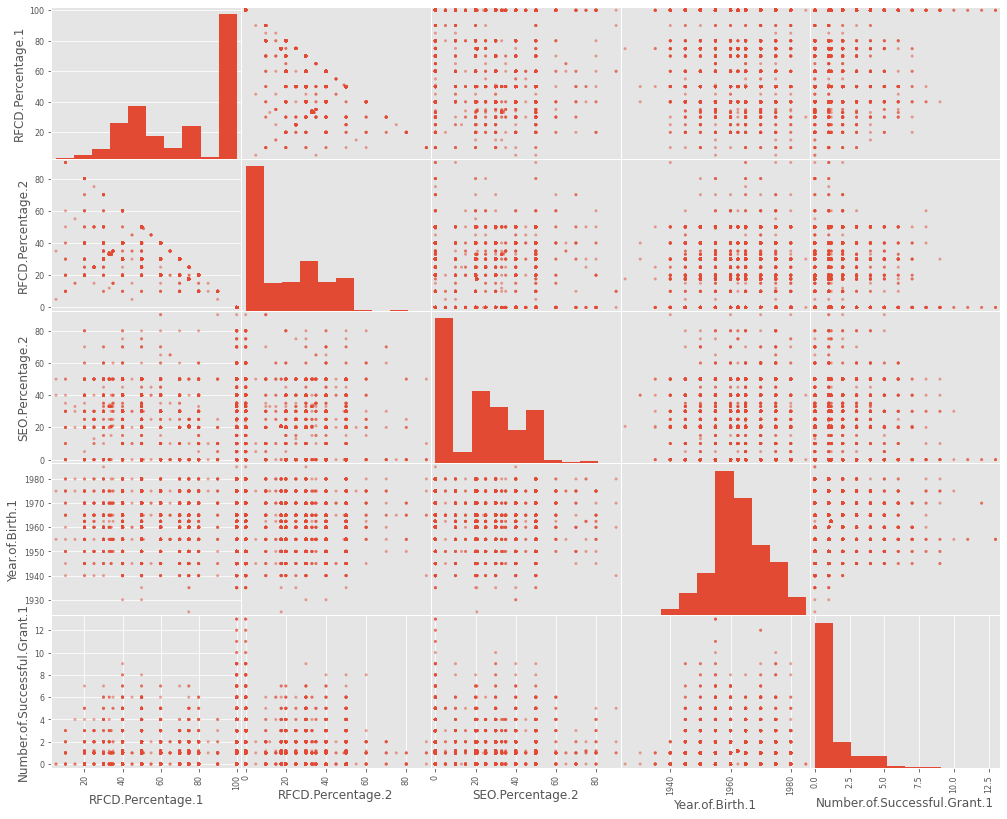

In [18]:
scatter_matrix(X_real_mean[cols_for_scatter], figsize=(17, 14))
plt.show()

Для 1 случайного признака из набора данных выведете его распределение. 

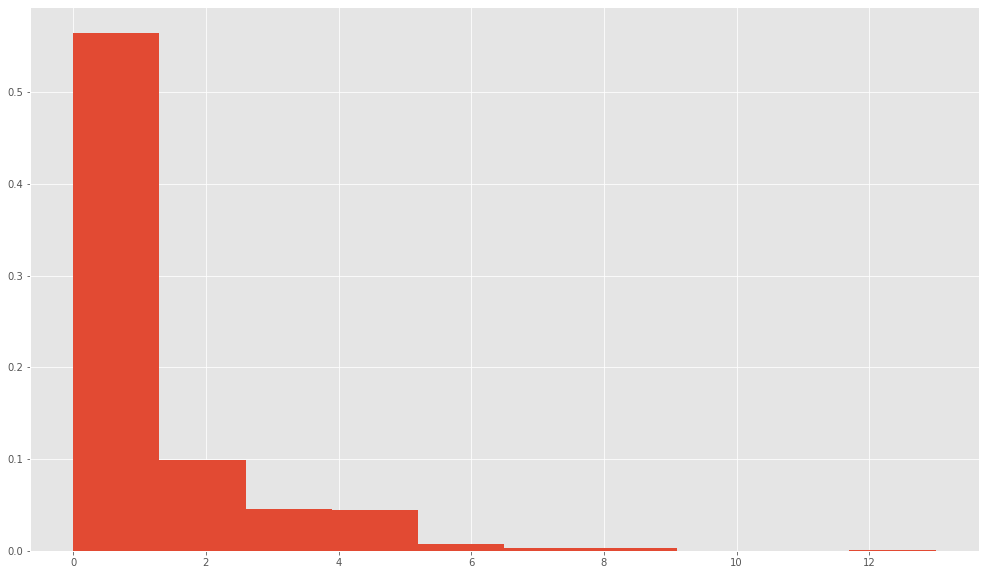

In [19]:
_, ax = plt.subplots(1, 1, figsize=(17, 10))
ax.hist(X_real_mean['Number.of.Successful.Grant.1'], density=True)
plt.show()

Если возникнут проблемы, то можете посмотреть [подсказку](https://habr.com/ru/company/ods/blog/323210/)

### 1.4 Масштабирование вещественных признаков.

Масштабированием называется общий процесс изменения диапазона признака. Это необходимый шаг, потому что признаки измеряются в разных единицах, а значит покрывают разные диапазоны. Это сильно искажает результаты таких алгоритмов, некоторые методы классификации, которые учитывают расстояния между измерениями. А масштабирование позволяет этого избежать.

По аналогии с вызовом one-hot encoder примените масштабирование вещественных признаков для полученной обучающей и тестовой выборки, используя класс [StandartScaler](https://scikit-learn.org/0.20/modules/generated/sklearn.preprocessing.StandardScaler.html)
и его методы 

        StandartScaler.fit_transform(...)
        StandartScaler.transform(...)
        
Результат выведете в отдельной ячейке

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_real_transformed = pd.DataFrame(scaler.fit_transform(X_real_mean), 
                                  columns=numeric_cols)  # Преобразую в датафрейм, чтобы красиво вывести

In [22]:
X_real_transformed

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,-0.958976,6.588368e-01,1.146025,-1.440027e-01,-0.072611,1.101630,-1.064625,-6.057722e-01,-0.19822,-1.046887e-01,0.278205,0.553168,-0.765088
1,0.971924,-9.451601e-01,-0.608052,-1.440027e-01,-0.072611,1.101630,-1.064625,-6.057722e-01,-0.19822,-1.046887e-01,0.278205,1.225998,-0.400409
2,-0.958976,6.588368e-01,1.146025,-1.440027e-01,-0.072611,-0.443609,-0.033355,1.143320e+00,-0.19822,-1.046887e-01,-0.812731,-0.119662,1.058307
3,-0.572796,1.193502e+00,-0.608052,-1.440027e-01,-0.072611,-0.443609,0.997914,-6.057722e-01,-0.19822,-1.046887e-01,-1.358198,0.553168,-0.400409
4,0.971924,-9.451601e-01,-0.608052,-1.440027e-01,-0.072611,-0.829919,1.513549,-6.057722e-01,-0.19822,-1.046887e-01,0.823673,-0.792492,-0.035730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,-0.958976,6.588368e-01,1.146025,-1.440027e-01,-0.072611,-0.829919,0.482279,1.143320e+00,-0.19822,-1.046887e-01,0.823673,0.553168,-0.765088
5996,0.000000,1.899514e-16,0.000000,3.650646e-17,0.000000,0.000000,0.000000,7.767530e-17,0.00000,1.369370e-17,1.369141,-0.792492,-0.765088
5997,-1.345156,1.193502e+00,1.146025,-1.440027e-01,-0.072611,-1.216228,0.997914,1.143320e+00,-0.19822,-1.046887e-01,-0.812731,1.225998,0.328949
5998,0.000000,1.899514e-16,0.000000,3.650646e-17,0.000000,0.000000,0.000000,7.767530e-17,0.00000,1.369370e-17,-1.358198,-0.792492,-0.765088


##  Задание 2. Понижение размерности. (2 балла)
Понижение размерности на практике позволяет значительно ускорить время обучения модели.

Чаще всего используются 2 метода:
- PCI
- DWT

Вайвлеты получили широкое распространение в обработке изображений. 

Упрощённо, изображение представляют собой таблицу, в ячейках которой хранятся цвета каждого пикселя. Если мы работаем с чёрно-белым (или, точнее, серым) изображением, то вместо цвета в ячейки помещают значения яркости из отрезка [0, 1]. При этом 0 соответствует чёрному цвету, 1 — белому. Но с дробями работать неудобно, поэтому часто значения яркости берут целыми из диапазона от 0 до 255. Тогда каждое значение будет занимать ровно 1 байт.

Даже небольшие изображения требуют много памяти для хранения. Так, если мы кодируем яркость каждого пикселя одним байтом, то изображение одного кадра формата FullHD (1920×1080) займёт почти два мегабайта. Представьте, сколько памяти потребуется для хранения полуторачасового фильма!

У «реальных» изображений, таких как фотографии, есть одна особенность — яркость соседних пикселей обычно отличается на небольшую величину. Поэтому, если мы возьмём 2 соседних пикселя и усредним их значения, то мы сможем уменьшить размер фотографии в 2 раза.

### 2.1 Вайвлет преобразование Хаара.
Дискретное вейвлет-преобразование (DWT – discrete wavelet transform) впервые предложено венгерским математиком Альфредом Хааром в 1909 г. Идея состоит в преобразовании ряда значений какой-либо величины (чаще всего временного ряда) в совокупность коэффициентов, представляющих этот ряд в сопряжённом линейном пространстве. Коэффициенты – это веса при базисных векторах вейвлета.

Как строится вейвлет-преобразование и как выбираются эти базисные вектора?

Пусть S – фрагмент временного ряда, который мы хотим компактно представить.

1. Среднее значение выборки S берется в качестве 1-го коэффициента вейвлета.

2. Рассчитывается величина, равная 1/2 разницы между средними значениями 1-й и 2-й половин временного ряда. Она берётся в качестве 2-го коэффициента вейвлета.

3. Эта процедура рекурсивно повторяется для каждой из двух половин выборки S до тех пор, пока мы не получим требуемую точность представления.

Пример: Есть цифровой термометр, который делает отсчёты каждую секунду. За 12 часов наберётся 12\*60\*60 = 43200 отсчётов. Теперь пусть у нас есть система анализа метеорологической информации: термометры расставлены на метеостанциях с шагом 25 – 50 км. Объём данных за сутки будет огромным. Нужно ли хранить их все? Соседние отсчёты обычно слабо отличаются – требуется сохранить только общую тенденцию.

Пусть q – длина выборки (для простоты считаем её равной степени 2). Для каждой величины $k\geq 1$ вейвлет Хаара определяется $2^{k-1}$ коэффициентами порядка k. Каждый из этих коэффициентов описывает непрерывный отрезок выборки длиной $\frac{q}{2^{k-1}}$ i-й из этих $2^{k-1}$ коэффициентов соответствует отрезку выборки начиная с $\frac{(i-1)-q}{2^{k-1}}$ по $\frac{i-q}{2^{k-1}}$ отсчёт включительно. Этот коэффициент обозначается через $\psi^{i}_{k}$, а соответствующий отрезок выборки – через $S^{i}_{k}$. Обозначим первую половину S через $a^{i}_{k}$, вторую половину – через $b^{i}_{k}$.
Тогда $\psi^{i}_{k} = \frac{a^{i}_{k} - b^{i}_{k}}{2}$.

Множество коэффициентов вейвлета Хаара состоит из всех коэффициентов порядков от 1-го до $log_{2}(q)$-го.

![](https://pp.userapi.com/c849224/v849224987/12a058/EoCgfl49UnE.jpg)

В качестве первого задания Вам предлагается посчитать коэффициенты 1-го порядка для изображения jackal.jpg

Для начала посмотрим что это за картинка и выведем её.

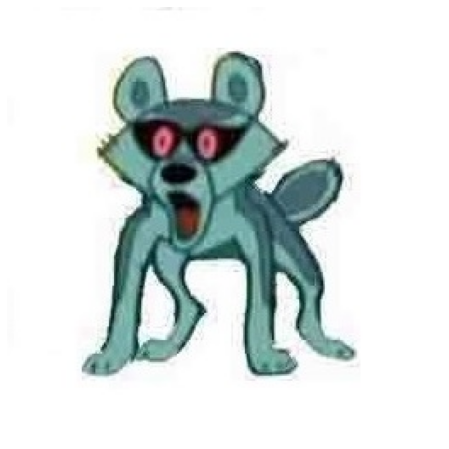

In [23]:
import matplotlib.image as mpimg
def show_img(img):
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.grid(False)
    plt.axis('off')
    plt.show()

path = 'jackal.jpg'
img = mpimg.imread(path)
show_img(img.astype('uint8'))

Теперь посмотрим, как её видит компьютер.

In [24]:
print(img.shape)

(256, 256, 3)


In [25]:
print(img[120:125,120:125])

[[[ 49  95  93]
  [ 87 137 136]
  [107 158 159]
  [106 160 160]
  [116 172 171]]

 [[ 52 101  98]
  [ 99 149 148]
  [120 171 172]
  [111 165 165]
  [117 173 172]]

 [[ 58 107 104]
  [111 161 160]
  [130 181 182]
  [115 169 169]
  [117 173 170]]

 [[ 63 113 110]
  [113 165 163]
  [127 181 181]
  [112 166 166]
  [116 172 169]]

 [[ 73 123 120]
  [112 164 162]
  [120 174 174]
  [107 163 162]
  [117 173 170]]]


Как и было сказано выше, это таблица, в ячейках которой хранятся цвета каждого пикселя.
Так как нам надо посчитать полуразность соседних двух элементов, то смысла возиться с трёхмерной матрицей нет. Давайте преобразуем её в массив с помощью функции [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) из numpy.


In [26]:
rows = img.shape[0]
cols = img.shape[1]

flat_img = img.reshape(rows * cols, 3).astype(float)

flat_img.shape

(65536, 3)

### 2.2 Реализовать функцию, подсчитывающую коэффициенты Хаара.

In [27]:
flat_img

array([[255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       ...,
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.]])

In [28]:
def Haar_coefficients(flat_img):
    if len(flat_img) == 1:
        return flat_img
    
    result = []
    temp = []

    for i in range(0, len(flat_img), 2):
        result.append((flat_img[i] - flat_img[i + 1]) / 2)
        temp.append((flat_img[i] + flat_img[i + 1]) / 2)
        
    return result + Haar_coefficients(temp)

### 2.3 Сжатие изображения

Ок, мы получили коэффициенты, но где же обещенное сжатие изображения?!

Чтобы получить сжатое изображение, нам надо заменить знак `-` на `+` в формуле:

$$\psi^{i}_{k} = \frac{a^{i}_{k} - b^{i}_{k}}{2} \rightarrow \psi^{i}_{k} = \frac{a^{i}_{k} + b^{i}_{k}}{2}$$

Теперь вместо коэффициентов Хаара мы получим среднее значение между двумя соседними пикселями, что позволит уменьшить размер изображения в 2 раза.

Про numpy.array можно почитать в [документации](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)

In [29]:
def compression(flat_img):
    if len(flat_img) == 1:
        return flat_img
    
    result = []

    for i in range(0, len(flat_img), 2):
        result.append((flat_img[i] + flat_img[i + 1]) / 2)
        
    result += Haar_coefficients(result)
    result = np.array(result)
    return result[:-int(flat_img.shape[0]/2)]

Сожмём исходное изображение

In [30]:
new_img=compression(flat_img)
print(new_img.shape)
print(new_img[60:65,60:65])

(32768, 3)
[]


И выведем его

(256, 128, 3)


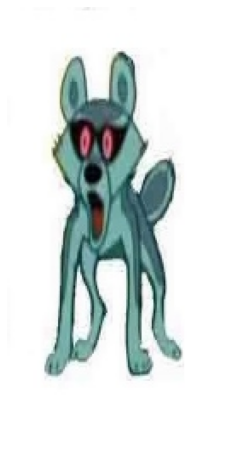

In [31]:
cmpr_img = new_img.astype('uint8').reshape(rows, int(cols/2), 3)
print(cmpr_img.shape)
show_img(cmpr_img)

Оно сжалось только по ширине. Давайте теперь сожмём его и по высоте.
Для этого не надо переписывать заново функцию `compression`. Достаточно исходную таблицу считать не по строкам, а по столбцам (!)

Для этого предлагаю снова обратиться к [документации](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)

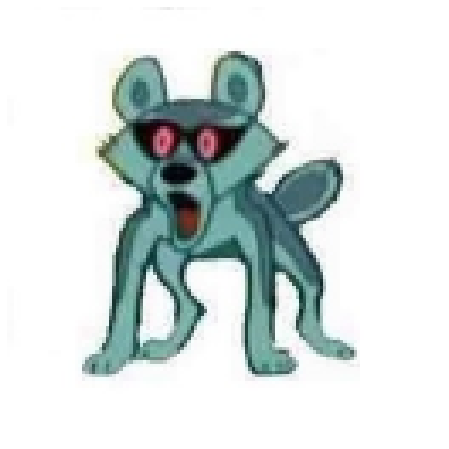

In [32]:
flat_img2 = cmpr_img.reshape((rows * cols // 2, 3), order='F').astype(float)
new_img2 = compression(flat_img2)

cmpr_img2 = new_img2.astype('uint8').reshape((rows // 2, cols // 2, 3), order='F')
show_img(cmpr_img2)

### Оцените полученный результат по следующей шкале
![](https://pp.userapi.com/c848620/v848620029/11d516/TrYFWxhXz7A.jpg)

# Выбираю **9** :)